In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_excel("C:\\Users\\UrMili\\Google Drive\\INSOFE\\Group Project_ML\\20190831_Batch64_CSE7305c_Group_UseCases\\Problem1\\PA_Data.xlsx")

In [5]:
df.head()

,UserID,Drug,DrugSubClass,DrugClass,Drug_Chemical_Name,GPI,NDC,DrugGroup,DoctorID,RxGroupId,Bin,PCN,State,TransDate,Target
0,C12662,Drug114,DSC082,DC078,DCN100,DGPI194,NDC228,DG048,PH1924,G652,B090,PCN0166,State19,2013-08-02,True
1,C10260,Drug188,DSC120,DC112,DCN156,DGPI203,NDC238,DG049,PH0254,G018,B014,PCN0005,State4,2013-07-25,False
2,C11997,Drug237,DSC040,DC038,DCN189,DGPI262,NDC323,DG031,PH1458,G481,B036,PCN0005,State2,2013-07-25,False
3,C10489,Drug167,DSC035,DC033,DCN141,DGPI329,NDC430,DG027,PH0483,G135,B003,PCN0003,State13,2013-07-28,True
4,C11209,Drug019,DSC017,DC004,DCN019,DGPI019,NDC020,DG004,PH0994,G231,B055,PCN0078,State22,2013-08-04,False


In [6]:
df.columns

Index(['UserID', 'Drug', 'DrugSubClass', 'DrugClass', 'Drug_Chemical_Name',
       'GPI', 'NDC', 'DrugGroup', 'DoctorID', 'RxGroupId', 'Bin', 'PCN',
       'State', 'TransDate', 'Target'],
      dtype='object')

In [7]:
df.isna().sum()

UserID                0
Drug                  0
DrugSubClass          0
DrugClass             0
Drug_Chemical_Name    0
GPI                   0
NDC                   0
DrugGroup             0
DoctorID              0
RxGroupId             0
Bin                   0
PCN                   0
State                 0
TransDate             0
Target                0
dtype: int64

In [8]:
df.dtypes

UserID                        object
Drug                          object
DrugSubClass                  object
DrugClass                     object
Drug_Chemical_Name            object
GPI                           object
NDC                           object
DrugGroup                     object
DoctorID                      object
RxGroupId                     object
Bin                           object
PCN                           object
State                         object
TransDate             datetime64[ns]
Target                          bool
dtype: object

In [9]:
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = df[i].astype('category')
        
df['Target'] = df["Target"].astype('int')

In [10]:
df.dtypes

UserID                      category
Drug                        category
DrugSubClass                category
DrugClass                   category
Drug_Chemical_Name          category
GPI                         category
NDC                         category
DrugGroup                   category
DoctorID                    category
RxGroupId                   category
Bin                         category
PCN                         category
State                       category
TransDate             datetime64[ns]
Target                         int32
dtype: object

In [11]:
df.nunique()

UserID                2682
Drug                   742
DrugSubClass           310
DrugClass              249
Drug_Chemical_Name     489
GPI                    974
NDC                   1609
DrugGroup               77
DoctorID              2468
RxGroupId              849
Bin                     97
PCN                    196
State                   47
TransDate               17
Target                   2
dtype: int64

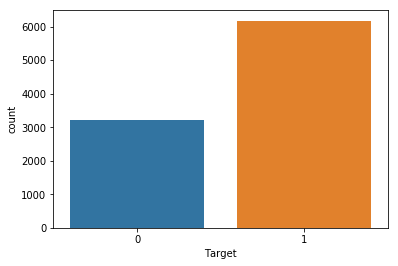

In [12]:
sns.countplot(x = 'Target', data = df)

In [13]:
df["DrugClass_id"] = df["DrugClass"].str.split("C", expand = True)[1]
df["Drug_id"] = df["Drug"].str.split("g", expand=True)[1]
df["Drug_Chemical_Name_id"] = df["Drug_Chemical_Name"].str.split("N", expand = True)[1]
df["GPI_id"]= df["GPI"].str.split("I",expand = True)[1]
df["NDC_id"]= df["NDC"].str.split("C",expand=True)[1]
df["DrugGroup_id"]= df["DrugGroup"].str.split("G", expand = True)[1]
df["DrugSubClass_id"] = df["DrugSubClass"].str.split("C",expand=True)[1]
df["State_id"] = df["State"].str.split("e",expand=True)[1]
df["PCN_id"]=df["PCN"].str.split("N",expand=True)[1]
df["Bin_id"]= df["Bin"].str.split("B",expand=True)[1]
df.head(2)

,UserID,Drug,DrugSubClass,DrugClass,Drug_Chemical_Name,GPI,NDC,DrugGroup,DoctorID,RxGroupId,...,DrugClass_id,Drug_id,Drug_Chemical_Name_id,GPI_id,NDC_id,DrugGroup_id,DrugSubClass_id,State_id,PCN_id,Bin_id
0,C12662,Drug114,DSC082,DC078,DCN100,DGPI194,NDC228,DG048,PH1924,G652,...,078,114,100,194,228,048,082,19,0166,090
1,C10260,Drug188,DSC120,DC112,DCN156,DGPI203,NDC238,DG049,PH0254,G018,...,112,188,156,203,238,049,120,4,0005,014


In [14]:
df['grouped_id']=df['DrugGroup_id'].astype("str")+df['DrugClass_id'].astype("str")+df['DrugSubClass_id'].astype("str")+df['Drug_Chemical_Name_id'].astype("str")

In [15]:
df['TransDate'].unique()

array(['2013-08-02T00:00:00.000000000', '2013-07-25T00:00:00.000000000',
       '2013-07-28T00:00:00.000000000', '2013-08-04T00:00:00.000000000',
       '2013-07-31T00:00:00.000000000', '2013-08-05T00:00:00.000000000',
       '2013-07-30T00:00:00.000000000', '2013-08-01T00:00:00.000000000',
       '2013-08-07T00:00:00.000000000', '2013-07-29T00:00:00.000000000',
       '2013-07-22T00:00:00.000000000', '2013-07-24T00:00:00.000000000',
       '2013-08-06T00:00:00.000000000', '2013-08-03T00:00:00.000000000',
       '2013-07-26T00:00:00.000000000', '2013-07-23T00:00:00.000000000',
       '2013-07-27T00:00:00.000000000'], dtype='datetime64[ns]')

In [16]:
df["Weekday"] = df['TransDate'].dt.dayofweek
df["Weekday"].unique()

array([4, 3, 6, 2, 0, 1, 5], dtype=int64)

In [17]:
df['Month'] = df['TransDate'].dt.month
df['Month'].unique()

array([8, 7], dtype=int64)

In [18]:
df['Day_of_Month'] = df['TransDate'].dt.day
df['Day_of_Month'].unique()

array([ 2, 25, 28,  4, 31,  5, 30,  1,  7, 29, 22, 24,  6,  3, 26, 23, 27],
      dtype=int64)

In [19]:
data = df.drop(['TransDate','RxGroupId', "DrugClass","Drug","Drug_Chemical_Name","GPI","NDC","DrugGroup","DrugSubClass","State","PCN","Bin", 'UserID', 'DoctorID', 'DrugClass_id', 'DrugGroup_id', 'DrugSubClass_id', 'Drug_Chemical_Name_id'], axis = 1)
data.head(2)

,Target,Drug_id,GPI_id,NDC_id,State_id,PCN_id,Bin_id,grouped_id,Weekday,Month,Day_of_Month
0,1,114,194,228,19,0166,090,048078082100,4,8,2
1,0,188,203,238,4,0005,014,049112120156,3,7,25


In [20]:
data.shape

(9393, 11)

In [21]:
data = data.sort_values(by='State_id', ascending=True, axis = 0)
data.head()

,Target,Drug_id,GPI_id,NDC_id,State_id,PCN_id,Bin_id,grouped_id,Weekday,Month,Day_of_Month
6241,1,381,452,617,1,0023,018,043062065285,2,7,24
6714,0,739,990,1593,1,0008,008,049083087214,2,7,24
6708,1,041,044,048,1,0005,014,024029031037,0,8,5
6683,1,057,062,066,1,0179,016,021042045052,0,7,29
1217,1,107,323,1513,1,0179,016,008073077094,2,8,7


In [22]:
X = data.drop('Target', axis = 1)
y = data['Target']
print('X.dtypes : \n', X.dtypes, '\n\n y.dtypes : \n', y.dtypes)

X.dtypes : 
 Drug_id         object
GPI_id          object
NDC_id          object
State_id        object
PCN_id          object
Bin_id          object
grouped_id      object
Weekday          int64
Month            int64
Day_of_Month     int64
dtype: object 

 y.dtypes : 
 int32


In [23]:
print(y.shape , '\n\n', y.head())

(9393,) 

 6241    1
6714    0
6708    1
6683    1
1217    1
Name: Target, dtype: int32


In [24]:
for i in X.columns:
    if X[i].dtypes == 'object':
        X[i] = X[i].astype('category')

X.dtypes

Drug_id         category
GPI_id          category
NDC_id          category
State_id        category
PCN_id          category
Bin_id          category
grouped_id      category
Weekday            int64
Month              int64
Day_of_Month       int64
dtype: object

In [25]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
cat_cols = ['Drug_id', 'NDC_id', 'State_id', 'PCN_id', 'Bin_id', 'grouped_id',  'GPI_id']
X_encoded = X
X_encoded[cat_cols] = X[cat_cols].apply(lambda col: label_encoder.fit_transform(col))
print(X_encoded.head())

print('\n\ndata dimensions : \n', X_encoded.shape , '\n\n data head : \n', X_encoded.head(), '\n\n Data types: \n', X_encoded.dtypes)

      Drug_id  GPI_id  NDC_id  State_id  PCN_id  Bin_id  grouped_id  Weekday  \
6241      380     451    1226         0      22      17         362        2   
6714      738     964     752         0       7       7         416        2   
6708       40      43      47         0       4      13         251        0   
6683       56      61      65         0     178      15         200        0   
1217      106     322     664         0     178      15          39        2   

      Month  Day_of_Month  
6241      7            24  
6714      7            24  
6708      8             5  
6683      7            29  
1217      8             7  


data dimensions : 
 (9393, 10) 

 data head : 
       Drug_id  GPI_id  NDC_id  State_id  PCN_id  Bin_id  grouped_id  Weekday  \
6241      380     451    1226         0      22      17         362        2   
6714      738     964     752         0       7       7         416        2   
6708       40      43      47         0       4      13      

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
print(X.shape , y.shape)

(9393, 10) (9393,)


In [28]:
train_x , val_x, train_y, val_y = train_test_split(X_encoded, y, stratify = y, test_size = 0.2, random_state = 2)
print('x_train dims: ', train_x.shape, '\n\n y_train :', train_y.shape, '\n\nx val x:', val_x.shape, '\n\n val y :', val_y.shape)

x_train dims:  (7514, 10) 

 y_train : (7514,) 

x val x: (1879, 10) 

 val y : (1879,)


## Model Building

### Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
# For evaluating our ML results
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,recall_score,f1_score,precision_score
from sklearn.metrics import roc_curve,log_loss,auc

In [50]:
logreg = LogisticRegression()
logreg.fit(train_x, train_y)

C:\Users\UrMili\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [51]:
y_pred = logreg.predict(val_x)

In [52]:
print("=========================== \n\n Confusion Matrix\n\n", confusion_matrix(val_y, y_pred))
print("\n\n========================== \n\n Accuracy Score\n\n", accuracy_score(val_y, y_pred))
print("\n\n========================== \n\n F1 Score for Class 0\n\n", f1_score(val_y, y_pred, pos_label=0))
print("\n\n========================== \n\n F1 Score for Class 1\n\n", f1_score(val_y, y_pred, pos_label=1))


 Confusion Matrix

 [[  16  628]
 [  24 1211]]



 Accuracy Score

 0.6530069185737094



 F1 Score for Class 0

 0.04678362573099415



 F1 Score for Class 1

 0.7878985035783994


### Decision Tree

In [53]:
from sklearn import tree

In [54]:
DT_classifier = tree.DecisionTreeClassifier(random_state=2, criterion = 'entropy')
DT_classifier.fit(train_x, train_y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=2,
            splitter='best')

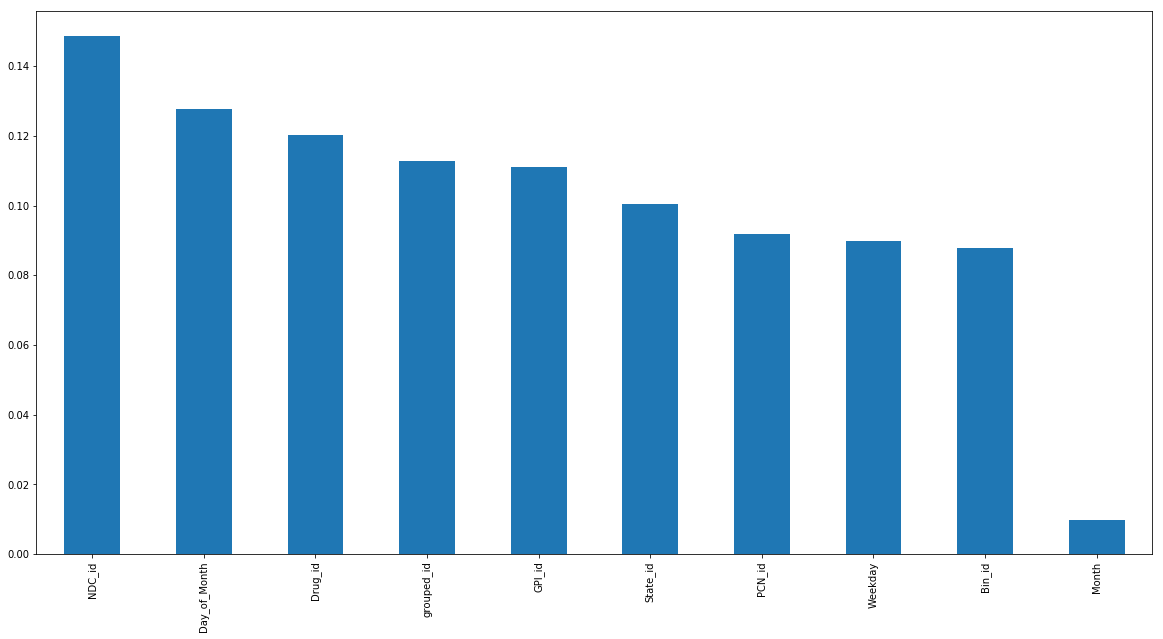

In [55]:
imp_feature = pd.Series(DT_classifier.feature_importances_, index = train_x.columns)
imp_ordered = imp_feature.nlargest(100)
plt.rcParams['figure.figsize'] = (20,10)
imp_ordered.plot(kind = 'bar')


In [56]:
print('\n\n6 Most important feautures: \n\n', imp_ordered.head(2))
print('=========================================')
print('\n\n6 Least important features: \n\n',imp_ordered.tail(2))



6 Most important feautures: 

 NDC_id          0.148486
Day_of_Month    0.127683
dtype: float64


6 Least important features: 

 Bin_id    0.087934
Month     0.009808
dtype: float64


In [57]:
pred_y = DT_classifier.predict(val_x)

In [58]:
print("=========================== \n\n Confusion Matrix\n\n", confusion_matrix(val_y, pred_y))
print("\n\n========================== \n\n Accuracy Score\n\n", accuracy_score(val_y, pred_y))
print("\n\n========================== \n\n F1 Score for Class 0\n\n", f1_score(val_y, pred_y, pos_label=0))
print("\n\n========================== \n\n F1 Score for Class 1\n\n", f1_score(val_y, pred_y, pos_label=1))


 Confusion Matrix

 [[305 339]
 [431 804]]



 Accuracy Score

 0.5902075572112826



 F1 Score for Class 0

 0.44202898550724634



 F1 Score for Class 1

 0.6761984861227923


### Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [60]:
RF_classifier = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=2)

In [61]:
param_grid = {'n_estimators' : [5,7,9,11,13,15,17,19],
             'max_depth' : [2,3,4,5,6,7,8,9,10,11,12],
              "min_samples_leaf" : [5, 10, 15, 20],
              "class_weight" : ['balanced','balanced_subsample']}

In [62]:
rfc_cv = RandomizedSearchCV(estimator=RF_classifier, param_distributions=param_grid, n_iter=10,cv=4)

In [64]:
rfc_cv.fit(train_x, train_y)

RandomizedSearchCV(cv=4, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=2, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'n_estimators': [5, 7, 9, 11, 13, 15, 17, 19], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 'min_samples_leaf': [5, 10, 15, 20], 'class_weight': ['balanced', 'balanced_subsample']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

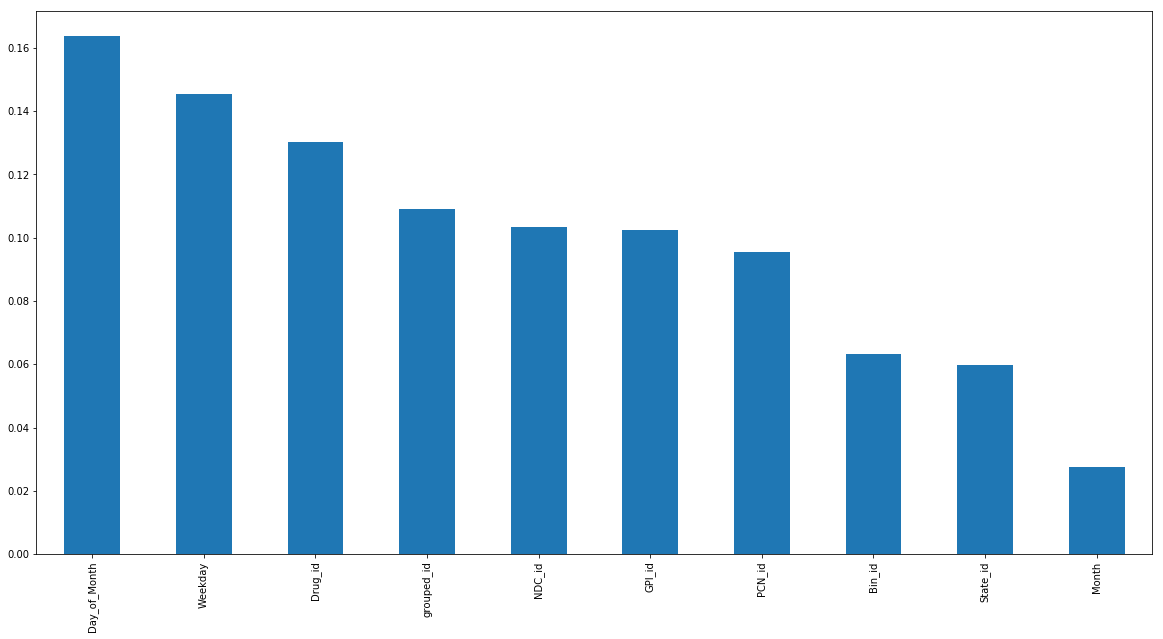

In [71]:
feat_importances = pd.Series(rfc_cv.best_estimator_.feature_importances_, index = train_x.columns)
feat_importances_ordered = feat_importances.nlargest(100)
feat_importances_ordered.plot(kind='bar')

In [65]:
rfc_cv.best_params_

{'n_estimators': 13,
 'min_samples_leaf': 15,
 'max_depth': 11,
 'class_weight': 'balanced_subsample'}

In [66]:
pred_y = rfc_cv.predict(val_x)

In [67]:
print("=========================== \n\n Confusion Matrix\n\n", confusion_matrix(val_y, pred_y))
print("\n\n========================== \n\n Accuracy Score\n\n", accuracy_score(val_y, pred_y))
print("\n\n========================== \n\n F1 Score for Class 0\n\n", f1_score(val_y, pred_y, pos_label=0))
print("\n\n========================== \n\n F1 Score for Class 1\n\n", f1_score(val_y, pred_y, pos_label=1))


 Confusion Matrix

 [[380 264]
 [446 789]]



 Accuracy Score

 0.6221394358701436



 F1 Score for Class 0

 0.5170068027210885



 F1 Score for Class 1

 0.6896853146853147


### Stacking

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [73]:
#Decision Tree

dtc = DecisionTreeClassifier()

dtc.fit(train_x,train_y)

y_pred_train_dtc = dtc.predict(train_x)
y_pred_test_dtc = dtc.predict(val_x)

In [74]:
#Logistic regression

lrc = LogisticRegression()

lrc.fit(train_x,train_y)

y_pred_train_lrc = lrc.predict(train_x)
y_pred_test_lrc = lrc.predict(val_x)

C:\Users\UrMili\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [75]:
classifier = SVC(kernel = 'linear', random_state = 0)

classifier.fit(train_x, train_y)

y_pred_train_svc = classifier.predict(train_x)
y_pred_test_svc = classifier.predict(val_x)

In [72]:
from scipy.stats import mode

In [76]:
stack_train = pd.DataFrame([y_pred_train_dtc,y_pred_train_lrc, y_pred_train_svc])
stack_test = pd.DataFrame([y_pred_test_dtc,y_pred_test_lrc, y_pred_test_svc])

In [77]:
stack_train = stack_train.T
stack_test = stack_test.T

In [78]:
stack_train.columns = ['y_pred_train_dtc','y_pred_train_lrc','y_pred_train_svc']
stack_train.columns = ['y_pred_test_dtc','y_pred_test_lrc','y_pred_test_svc']

In [79]:
print(stack_train.shape)
print(stack_test.shape)

(7514, 3)
(1879, 3)


In [80]:
dtc = LogisticRegression()

dtc.fit(stack_train,train_y)

stacked_pred_train = dtc.predict(stack_train)
stacked_pred_test = dtc.predict(stack_test)

C:\Users\UrMili\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [81]:
print("TRAIN DATA ACCURACY",accuracy_score(train_y,stacked_pred_train))
print("\nTrain data f1-score for class '1'",f1_score(train_y,stacked_pred_train,pos_label=0))
print("\nTrain data f1-score for class '2'",f1_score(train_y,stacked_pred_train,pos_label=1))

### Test data accuracy
print("\n\n--------------------------------------\n\n")
print("TEST DATA ACCURACY",accuracy_score(val_y,stacked_pred_test))
print("\nTest data f1-score for class '1'",f1_score(val_y,stacked_pred_test,pos_label=0))
print("\nTest data f1-score for class '2'",f1_score(val_y,stacked_pred_test,pos_label=1))

TRAIN DATA ACCURACY 0.8749001863188715

Train data f1-score for class '1' 0.8253437383872166

Train data f1-score for class '2' 0.9025502799087705


--------------------------------------


TEST DATA ACCURACY 0.5806279936136243

Test data f1-score for class '1' 0.4289855072463768

Test data f1-score for class '2' 0.6686291000841043


## Naives Bayes

In [29]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(train_x, train_y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [35]:
pred_y = classifier.predict(val_x)

In [36]:
print("=========================== \n\n Confusion Matrix\n\n", confusion_matrix(val_y, pred_y))
print("\n\n========================== \n\n Accuracy Score\n\n", accuracy_score(val_y, pred_y))
print("\n\n========================== \n\n F1 Score for Class 0\n\n", f1_score(val_y, pred_y, pos_label=0))
print("\n\n========================== \n\n F1 Score for Class 1\n\n", f1_score(val_y, pred_y, pos_label=1))


 Confusion Matrix

 [[ 124  520]
 [ 148 1087]]



 Accuracy Score

 0.6444917509313465



 F1 Score for Class 0

 0.27074235807860264



 F1 Score for Class 1

 0.7649542575650952
